# **1. INTRODUCTION**

## **a. Description and Objectives**

The dataset contains records of retail transanctions. It's made up of 8 columns including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID and Country. The dataset was derived from Kaggle and below are the objectives of the analysis;
1. To identify products that drive most revenue
2. Which customers are the most valuable for the company
3. Which countries contribute the most revenue
4. Seasonal patterns in sales
5. Which products are frequently returned
6. How to target customers for marketing

## **b. Libraries and Dataset Upload**

In [315]:
# import libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

In [317]:
#upload the dataset
file_path = '/content/drive/MyDrive/Online strore Dataset.csv'
df = pd.read_csv(file_path)

# **2. EYEBALLING**

In [318]:
# data overview
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
300810,563214,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,3,14/08/2011 12:56,2.95,"16,370.00",United Kingdom
415551,572544,21115,ROSE CARAVAN DOORSTOP,3,24/10/2011 16:34,6.75,"16,023.00",United Kingdom
241474,558232,22252,BIRDCAGE DECORATION TEALIGHT HOLDER,2,27/06/2011 14:30,1.25,"17,841.00",United Kingdom
509187,579297,21931,JUMBO STORAGE BAG SUKI,2,29/11/2011 11:23,4.13,NaN,United Kingdom
254912,559337,22741,FUNKY DIVA PEN,1,07/07/2011 16:27,1.63,NaN,United Kingdom
128901,547367,22068,BLACK PIRATE TREASURE CHEST,2,22/03/2011 13:11,1.65,"15,437.00",United Kingdom
140203,548384,85231B,CINAMMON SET OF 9 T-LIGHTS,1,30/03/2011 16:47,0.85,NaN,United Kingdom
60793,541423,22209,WOOD STAMP SET HAPPY BIRTHDAY,3,17/01/2011 17:54,1.63,NaN,United Kingdom
218114,556017,21507,"ELEPHANT, BIRTHDAY CARD,",12,08/06/2011 11:56,0.42,"15,382.00",United Kingdom
124420,546977,21172,PARTY METAL SIGN,1,18/03/2011 12:08,4.13,NaN,United Kingdom


In [319]:
df.shape

(541909, 8)

In [320]:
#dataset characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [321]:
# Rows and Columns
rows = df.shape[0]
columns = df.shape[1]
print(f'rows: {rows}, \n columns: {columns}')

rows: 541909, 
 columns: 8


In [322]:
#check missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [323]:
df = df.dropna()

# **3. DATA CLEANING AND PREPROCESSING**

In [324]:
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [325]:
# new data shape
df.shape

(406829, 8)

In [326]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [327]:
#convert customerid to string
df['CustomerID'] = df['CustomerID'].astype(int)
df['CustomerID'] = df['CustomerID'].astype(str)

In [328]:
# invoicedate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [330]:
df['CustomerID'].nunique()

4372

In [331]:
# Calculate revenue
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [332]:
df.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
77904,542791,22435,SET OF 9 HEART SHAPED BALLOONS,10,2011-02-01 10:47:00,1.25,15039,United Kingdom,12.50
246228,558684,23092,LARGE ANTIQUE WHITE PHOTO FRAME,2,2011-07-01 11:29:00,7.90,14016,EIRE,15.80
338347,566539,22966,GINGERBREAD MAN COOKIE CUTTER,3,2011-09-13 11:34:00,1.25,17228,United Kingdom,3.75
260484,559813,22969,HOMEMADE JAM SCENTED CANDLES,24,2011-07-12 15:42:00,1.45,18272,United Kingdom,34.80
78731,542895,85123A,WHITE HANGING HEART T-LIGHT HOLDER,3,2011-02-01 13:47:00,2.95,14549,United Kingdom,8.85
519180,580136,22329,ROUND CONTAINER SET OF 5 RETROSPOT,1,2011-12-01 19:42:00,1.65,17841,United Kingdom,1.65
281162,561514,22560,TRADITIONAL MODELLING CLAY,24,2011-07-27 15:14:00,1.25,14331,United Kingdom,30.00
205245,554765,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-05-26 11:38:00,1.65,16837,United Kingdom,19.80
6550,536947,21121,SET/10 RED POLKADOT PARTY CANDLES,24,2010-12-03 12:29:00,1.25,13013,United Kingdom,30.00
463216,576055,23330,DECORATIVE WICKER HEART MEDIUM,12,2011-11-13 15:02:00,1.25,15449,United Kingdom,15.00


In [333]:
# extract hour
df['Hour'] = df['InvoiceDate'].dt.hour
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['Invoice_Date'] = df['InvoiceDate'].dt.date

In [334]:
#create year_month column
df['Year_month'] = df['InvoiceDate'].dt.to_period('M')

In [335]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [336]:
df['Country'] = df['Country'].replace('EIRE', 'Ireland')

In [337]:
#map quarters
df['Quarter'] = df['Quarter'].map({1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'})

In [338]:
# Create time column
bins = [0, 11, 16, 23]
labels = ['Morning', 'Afternoon', 'Evening']
df['Time'] = pd.cut(df['Hour'], bins=bins, labels=labels)

In [339]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Hour,Day,Month,Year,Quarter,Invoice_Date,Year_month,Time
390906,570637,23200,JUMBO BAG PEARS,20,2011-10-11 12:34:00,2.08,12530,Germany,41.60,12,Tuesday,October,2011,Q4,2011-10-11,2011-10,Afternoon
19572,537868,22567,20 DOLLY PEGS RETROSPOT,24,2010-12-08 16:49:00,1.25,12433,Norway,30.00,16,Wednesday,December,2010,Q4,2010-12-08,2010-12,Afternoon
274218,560892,82482,WOODEN PICTURE FRAME WHITE FINISH,24,2011-07-21 17:08:00,2.55,13089,United Kingdom,61.20,17,Thursday,July,2011,Q3,2011-07-21,2011-07,Evening


In [340]:
# Check and treat outliers
df[df['Quantity']>3000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Hour,Day,Month,Year,Quarter,Invoice_Date,Year_month,Time
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom,"6,539.40",12,Tuesday,January,2011,Q1,2011-01-11,2011-01,Afternoon
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,"77,183.60",10,Tuesday,January,2011,Q1,2011-01-18,2011-01,Morning
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom,"3,202.92",10,Tuesday,February,2011,Q1,2011-02-22,2011-02,Morning
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749,United Kingdom,"6,539.40",13,Monday,April,2011,Q2,2011-04-18,2011-04,Afternoon
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135,United Kingdom,"3,096.00",10,Friday,May,2011,Q2,2011-05-27,2011-05,Morning
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609,United Kingdom,191.16,17,Tuesday,July,2011,Q3,2011-07-19,2011-07,Evening
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901,United Kingdom,"1,008.00",12,Thursday,October,2011,Q4,2011-10-27,2011-10,Afternoon
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2011-11-25 15:57:00,0.00,13256,United Kingdom,0.00,15,Friday,November,2011,Q4,2011-11-25,2011-11,Afternoon
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,"168,469.60",9,Friday,December,2011,Q4,2011-12-09,2011-12,Morning


In [341]:
# treat outliers for quantity
quant = df['Quantity']

#calculate IQR
Q1 = quant.quantile(0.25)
Q3 = quant.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (quant<lower_bound)|(quant >upper_bound)



# treat
df['Quantity'] = quant.clip(lower= lower_bound, upper=upper_bound)

<Axes: >

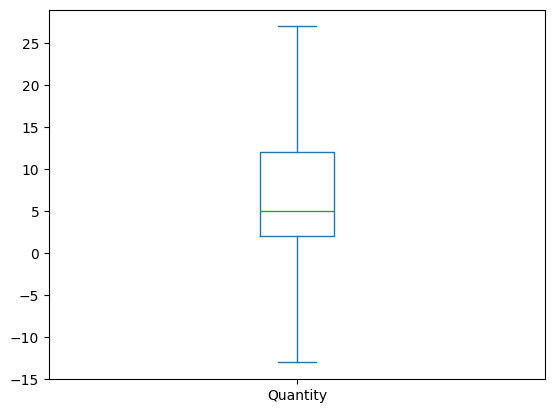

In [342]:
# box plot for quantity
df['Quantity'].plot(kind='box')

In [343]:
# treat unit price
unit_pric = df['UnitPrice']
#calculate IQR
Q1 = unit_pric.quantile(0.25)
Q3 = unit_pric.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = (unit_pric<lower_bound)|(unit_pric >upper_bound)


#treat
df['UnitPrice'] = unit_pric.clip(lower=lower_bound, upper=upper_bound)

<Axes: >

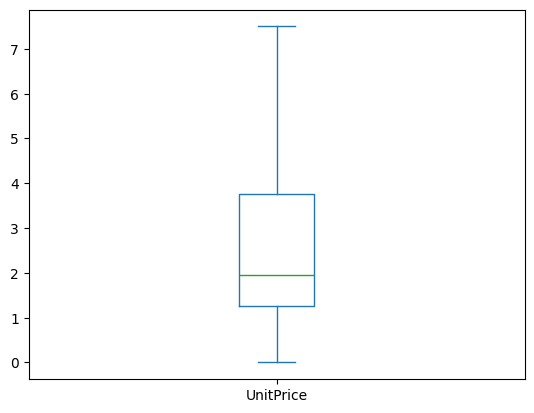

In [344]:
# unit price box plot
df['UnitPrice'].plot(kind='box')

In [345]:
# Calculate revenue (sterling pound)
df['Revenue'] = df['Quantity']*df['UnitPrice']

# **4. EXPLORATORY DATA ANALYSIS (EDA)**

## a. Descriptive Statistics

In [378]:
# Descriptive stats
df.describe()

,Quantity,InvoiceDate,UnitPrice,Revenue,Hour,Year
count,"397,924.00",397924,"397,924.00","397,924.00","397,924.00","397,924.00"
mean,8.32,2011-07-10 23:43:36.912475648,2.60,15.02,12.73,"2,010.93"
min,1.00,2010-12-01 08:26:00,0.00,0.00,6.00,"2,010.00"
25%,2.00,2011-04-07 11:12:00,1.25,4.68,11.00,"2,011.00"
50%,6.00,2011-07-31 14:39:00,1.95,10.50,13.00,"2,011.00"
75%,12.00,2011-10-20 14:33:00,3.75,17.70,14.00,"2,011.00"
max,27.00,2011-12-09 12:50:00,7.50,202.50,20.00,"2,011.00"
std,8.10,NaN,2.10,17.59,2.27,0.25


**Notes**
- Quantity averages 8 items
- Negative quantities represents items returned by the customers
- The maximum quantity per line is 27 items
- The mean of Unit Price is £2.6, meaning most products are priced under £4

## b. Revenue Trends

In [379]:
# summary stats
df['Revenue'].describe()

,Revenue
count,"397,924.00"
mean,15.02
std,17.59
min,0.00
25%,4.68
50%,10.50
75%,17.70
max,202.50


**Notes**
- Average revenue per transaction is £14.46
- Negative values represent equivalent value of sales returns
- 25% of the transactions generates £4.2 or less in revenue
75% of the transactions generated £17.7 or less in revenue
- The maximum revenue was £202.5
- Coefficient of variation (17.89/14.46) is 1.24 indicating high variability in revenue

In [380]:
# revenue across years

df.groupby(['Year', 'Month'])['Revenue'].agg('sum').reset_index().sort_values(['Year', 'Revenue'])

,Year,Month,Revenue
0,2010,December,"400,941.79"
3,2011,December,"240,642.87"
4,2011,February,"314,492.16"
1,2011,April,"330,944.79"
5,2011,January,"332,786.87"
6,2011,July,"409,613.77"
8,2011,March,"411,288.10"
7,2011,June,"415,364.81"
2,2011,August,"429,619.88"
9,2011,May,"470,714.29"


**Notes**
- Revenue distributed in two years,from Dec 2010  to Nov 2011
- November was the best performing month with revenue of £853,395.11
- December 2011 was the lowest performing month followed by February

In [381]:
# total revenue by quarter
df.groupby(['Year', 'Quarter'])['Revenue'].agg('sum').reset_index().sort_values(by='Revenue')

,Year,Quarter,Revenue
0,2010,Q4,"400,941.79"
1,2011,Q1,"1,058,567.13"
2,2011,Q2,"1,217,023.89"
3,2011,Q3,"1,490,091.20"
4,2011,Q4,"1,811,882.64"


In [382]:
df.groupby(['Quarter'])['Revenue'].agg('sum').reset_index().sort_values(by='Revenue')

,Quarter,Revenue
0,Q1,"1,058,567.13"
1,Q2,"1,217,023.89"
2,Q3,"1,490,091.20"
3,Q4,"2,212,824.43"


**Notes**
- Q4 was the best performing quarter in 2011 with a total revenue of £1,781,937
- Q1 was generated the lowest total revenue with £1,039,544


In [383]:
# Revenue by time of the day
df.groupby('Time')['Revenue'].agg('sum').reset_index().sort_values(by='Revenue')

,Time,Revenue
2,Evening,"259,293.38"
0,Morning,"2,164,842.64"
1,Afternoon,"3,554,370.63"


**Notes**
- Most revenue is generated in the afternoon indicating that most customers make their online transactions in the afternoon
- Least revenue is generated in the evenings

In [352]:
df.sample(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Hour,Day,Month,Year,Quarter,Invoice_Date,Year_month,Time
434694,574056,21249,WOODLAND HEIGHT CHART STICKERS,27,2011-11-02 14:09:00,2.55,14646,Netherlands,68.85,14,Wednesday,November,2011,Q4,2011-11-02,2011-11,Afternoon
443572,574704,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,2,2011-11-06 14:02:00,7.50,15696,United Kingdom,15.00,14,Sunday,November,2011,Q4,2011-11-06,2011-11,Afternoon
225037,556632,48129,DOORMAT TOPIARY,2,2011-06-13 15:09:00,7.50,16987,United Kingdom,15.00,15,Monday,June,2011,Q2,2011-06-13,2011-06,Afternoon


## **c. Product Analysis**

In [386]:
# 10 ten best performing products categories
df.groupby('Description')['Revenue'].agg('sum').reset_index().sort_values(by='Revenue', ascending=True)[-10:]

,Description,Revenue
1016,DOORMAT KEEP CALM AND COME IN,"24,577.14"
1729,JAM MAKING SET WITH JARS,"26,126.92"
2313,PAPER CHAIN KIT 50'S CHRISTMAS,"27,095.54"
722,CHILLI LIGHTS,"27,407.23"
3324,SPOTTY BUNTING,"28,180.00"
216,ASSORTED COLOUR BIRD ORNAMENT,"34,119.32"
1762,JUMBO BAG RED RETROSPOT,"39,180.61"
2345,PARTY BUNTING,"48,368.40"
3698,WHITE HANGING HEART T-LIGHT HOLDER,"55,970.23"
2767,REGENCY CAKESTAND 3 TIER,"73,765.00"


## d. Geographic Trends

In [387]:
# revenue by country
df.groupby('Country')['Revenue'].agg('sum').reset_index().sort_values(by='Revenue', ascending=False)

,Country,Revenue
35,United Kingdom,"5,002,664.93"
13,Germany,"185,452.27"
16,Ireland,"165,657.53"
12,France,"160,028.07"
23,Netherlands,"91,809.95"
0,Australia,"48,188.08"
32,Switzerland,"44,048.23"
30,Spain,"41,818.21"
3,Belgium,"35,461.81"
24,Norway,"26,988.86"


# **5. RFM ANALYSIS**

In [389]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [358]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Hour,Day,Month,Year,Quarter,Invoice_Date,Year_month,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Wednesday,December,2010,Q4,2010-12-01,2010-12,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,December,2010,Q4,2010-12-01,2010-12,Morning


In [390]:
# Recency
analysis_date = df['InvoiceDate'].max()
analysis_date

last_tran_date = df.groupby('CustomerID')['InvoiceDate'].max()
recency = (analysis_date-last_tran_date).dt.days.reset_index()
recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)
recency.sample(4)

,CustomerID,Recency
2635,15935,238
1742,14715,24
59,12421,15
102,12473,28


In [391]:
# Monetary
monetary = df.groupby('CustomerID', as_index=False)['Revenue'].agg('sum')
monetary.rename(columns={'Revenue':'Monetary'}, inplace=True)
monetary.sample(4)

,CustomerID,Monetary
754,13347,263.22
2183,15318,305.69
3521,17157,319.00
2882,16271,"1,399.03"


In [392]:
#frequency
frequency = df.groupby('CustomerID', as_index=False)['InvoiceNo'].nunique()
frequency.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
frequency.sample(3)

,CustomerID,Frequency
738,13324,10
763,13357,1
3154,16653,2


In [393]:
#merge dataframes
rfm = recency.merge(monetary, on='CustomerID').merge(frequency, on='CustomerID')
rfm.sample(3)

,CustomerID,Recency,Monetary,Frequency
2083,15187,1,"3,869.63",16
2799,16160,64,623.19,2
1299,14108,30,581.86,2


In [395]:
# create bins and labels
rfm['Recency_score'] = pd.qcut(rfm['Recency'].rank(method='first'), q=5, labels=[5,4,3,2,1])
rfm['Monetary_score'] = pd.qcut(rfm['Monetary'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm['Frequency_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1,2,3,4,5])
rfm['Score'] = rfm['Recency_score'].astype(str) + rfm['Monetary_score'].astype(str) + rfm['Frequency_score'].astype(str)

In [396]:
rfm.sample(3)

,CustomerID,Recency,Monetary,Frequency,Recency_score,Monetary_score,Frequency_score,Score
3312,16856,14,35.40,1,4,1,2,412
516,13021,3,"2,426.11",9,5,5,5,555
2350,15544,8,"3,516.89",9,5,5,5,555


In [398]:
# lets write a short function to elaborate the score further by segmentation
def segment_customers (row):
  if row['Score']=='555':
    return 'Premium customers'
  elif row['Frequency_score']>=4:
    return 'Loyal customers'
  elif row['Monetary_score']>=4:
    return 'Heavy transactors'
  elif row['Recency_score']>=3:
    return 'Recent Customers'
  elif row['Recency_score']<=2:
    return 'Low engagement customers'
  elif row['Recency_score']<=3 and row['Frequency_score']<=2:
    return 'Dormant customers'
  elif row['Recency_score']>=4 and row['Frequency_score']>=3:
    return 'Active Customers'
  else:
    return 'Lost customers'


In [399]:
# create a segment column then apply
rfm['Segment'] = rfm.apply(segment_customers, axis=1)
rfm.sample(3)

,CustomerID,Recency,Monetary,Frequency,Recency_score,Monetary_score,Frequency_score,Score,Segment
2675,15993,8,"2,655.25",7,5,5,5,555,Premium customers
776,13375,88,716.56,1,2,3,1,231,Low engagement customers
1929,14985,197,286.11,2,1,2,3,123,Low engagement customers


In [400]:
# sample top customers
rfm[rfm['Segment']=='Premium customers'][:10].sort_values(by='Monetary', ascending=False)

,CustomerID,Recency,Monetary,Frequency,Recency_score,Monetary_score,Frequency_score,Score,Segment
100,12471,1,"13,922.90",30,5,5,5,555,Premium customers
71,12433,0,"10,779.25",7,5,5,5,555,Premium customers
115,12490,4,"4,812.62",10,5,5,5,555,Premium customers
15,12362,2,"4,788.28",10,5,5,5,555,Premium customers
75,12437,1,"4,066.44",18,5,5,5,555,Premium customers
1,12347,1,"3,877.44",7,5,5,5,555,Premium customers
165,12553,7,"3,345.72",10,5,5,5,555,Premium customers
172,12562,7,"3,262.68",7,5,5,5,555,Premium customers
143,12524,8,"3,098.46",8,5,5,5,555,Premium customers
56,12417,2,"3,056.13",9,5,5,5,555,Premium customers


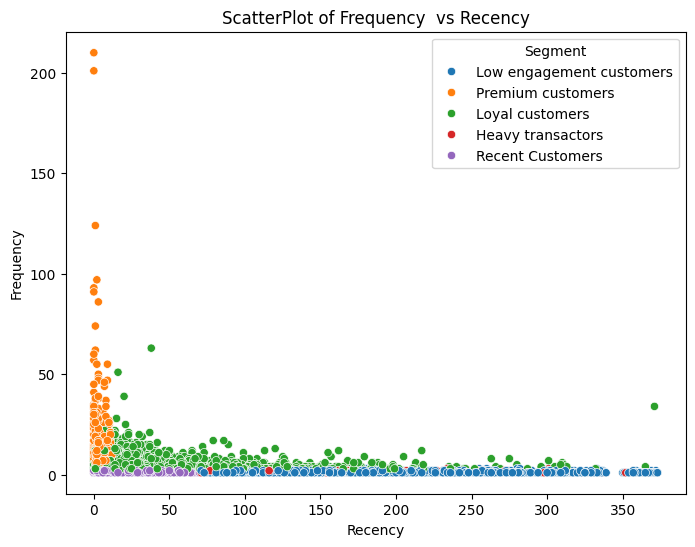

In [401]:
# Visualize the rfm score results of frequency against monetary
plt.figure(figsize=(8,6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Segment')
plt.title('ScatterPlot of Frequency  vs Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

# **6. COHORT ANALYSIS**

In [407]:
# create transaction month
#df['TransactionMonth'] =df['TransactionDate'].dt.to_period('M')
cohort = df.groupby('CustomerID')['Year_month'].min().reset_index()
cohort.rename(columns={'Year_month':'CohortMonth'}, inplace=True)
cohort.sample(4)

,CustomerID,CohortMonth
2962,16383,2011-03
977,13662,2011-03
3554,17205,2011-10
2148,15269,2011-11


In [408]:
# merge the dataframe on the main dataframe
df = df.merge(cohort, on = 'CustomerID')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Hour,Day,Month,Year,Quarter,Invoice_Date,Year_month,Time,CohortMonth_x,CohortMonth_y,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Wednesday,December,2010,Q4,2010-12-01,2010-12,Morning,2010-12,2010-12,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday,December,2010,Q4,2010-12-01,2010-12,Morning,2010-12,2010-12,2010-12


In [409]:
#calculating retention

#group by both cohort month and transaction month
cohort_df = df.groupby(['CohortMonth', 'Year_month']).agg(n_customer=('CustomerID','nunique')).reset_index()
cohort_df.head(5)

,CohortMonth,Year_month,n_customer
0,2010-12,2010-12,885
1,2010-12,2011-01,324
2,2010-12,2011-02,286
3,2010-12,2011-03,340
4,2010-12,2011-04,321


In [410]:
#group the cohort_df by cohort month and pick the first
cohort_size = cohort_df.groupby('CohortMonth')['n_customer'].first().reset_index()
cohort_size.rename(columns={'n_customer': 'Cohort_size'}, inplace=True)

In [411]:
#merge with cohort_df
cohort_df = cohort_df.merge(cohort_size, on='CohortMonth')
cohort_df

,CohortMonth,Year_month,n_customer,Cohort_size
0,2010-12,2010-12,885,885
1,2010-12,2011-01,324,885
2,2010-12,2011-02,286,885
3,2010-12,2011-03,340,885
4,2010-12,2011-04,321,885
...,...,...,...,...
86,2011-10,2011-11,86,358
87,2011-10,2011-12,41,358
88,2011-11,2011-11,324,324
89,2011-11,2011-12,36,324


In [412]:
#create new column called transaction rate
cohort_df['Transaction_Rate'] = cohort_df['n_customer']/ cohort_df['Cohort_size']

#del cohort_df['Retention_Rate']
cohort_df

,CohortMonth,Year_month,n_customer,Cohort_size,Transaction_Rate
0,2010-12,2010-12,885,885,1.00
1,2010-12,2011-01,324,885,0.37
2,2010-12,2011-02,286,885,0.32
3,2010-12,2011-03,340,885,0.38
4,2010-12,2011-04,321,885,0.36
...,...,...,...,...,...
86,2011-10,2011-11,86,358,0.24
87,2011-10,2011-12,41,358,0.11
88,2011-11,2011-11,324,324,1.00
89,2011-11,2011-12,36,324,0.11


In [413]:
#create a purchase matrix by use of a pivot table

purchase_matrix = cohort_df.pivot(
                              index = 'CohortMonth',
                              columns = 'Year_month',
                              values = 'Transaction_Rate'


)
purchase_matrix

Year_month,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
CohortMonth,,,,,,,,,,,,,
2010-12,1.00,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01,NaN,1.00,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12
2011-02,NaN,NaN,1.00,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07
2011-03,NaN,NaN,NaN,1.00,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09
2011-04,NaN,NaN,NaN,NaN,1.00,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07
2011-05,NaN,NaN,NaN,NaN,NaN,1.00,0.19,0.17,0.17,0.21,0.23,0.26,0.10
2011-06,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.17,0.16,0.26,0.23,0.33,0.10
2011-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.18,0.21,0.22,0.27,0.11
2011-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,0.21,0.25,0.24,0.12


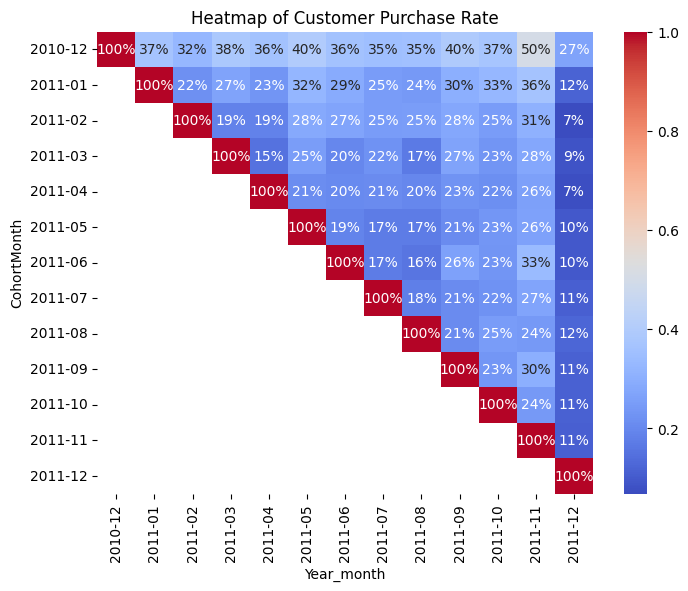

In [376]:
# use heatmap to visualize the matrix

plt.figure(figsize=(8,6))
sns.heatmap(purchase_matrix, annot = True, cmap='coolwarm', fmt='.0%')
plt.title('Heatmap of Customer Purchase Rate')
plt.show()

In [377]:
df.to_csv('OnlineStore.csv', index=False)